In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

import pandas as pd
import matplotlib.pyplot as plt
from games.experiments import EXPERIMENTS, ExperimentParams
EXPERIMENT_NAME = "connect_four_configuration_exp_c"
experiment = EXPERIMENTS[EXPERIMENT_NAME]

2025-03-24 11:01:04.860281: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 11:01:04.893447: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-24 11:01:04.893472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-24 11:01:04.894334: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-24 11:01:04.900275: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def load_avg_results(experiment: ExperimentParams, benchmark: str, nr_random_moves: int):
    file_path =  Path('..') / experiment.results_dir_path / benchmark / f"nr_random_moves_{nr_random_moves}" / "avg_results.csv"
    ratings = pd.read_csv(file_path)
    return ratings

def load_results(experiment: ExperimentParams, benchmark: str, nr_random_moves: int):
    file_path = experiment.results_dir_path / benchmark / f"nr_random_moves_{nr_random_moves}" / "results.csv"
    results = pd.read_csv(file_path)
    return results


In [3]:
def plot_ratings_bar(ax, avg_values: pd.DataFrame, name_label0=''):
    avg_values = avg_values.copy()
    avg_values['c'] = avg_values['c'].astype(str)

    labels = [f'$2^{{{i}}}$' for i in range(-7, 3)]
    if name_label0:
        labels = [name_label0] + labels

    ax.bar(labels, avg_values['win_rate'], yerr=[avg_values['win_rate'] - avg_values['lower_bound'], avg_values['upper_bound'] - avg_values['win_rate']], capsize=5)
    ax.set_xlabel('C', fontstyle='italic', fontweight='bold')

    ax.set_ylabel('Mean win rate')
    ax.set_ylim(0, 1)
    ax.axhline(y=0.5, color='k', linestyle='--')  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', which='both', length=0)

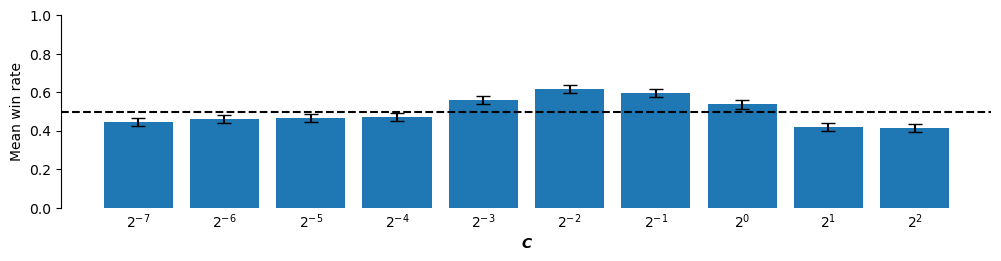

In [4]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 2.5))

avg_values = load_avg_results(experiment, "model_performances_c_values", 2)
plot_ratings_bar(ax1, avg_values)

In [5]:
def plot_ratings_bar(ax, avg_values: pd.DataFrame, name_label0=''):
    avg_values = avg_values.copy()
    avg_values['c'] = avg_values['c'].astype(str)

    labels = [f'$2^{{{i}}}$' for i in range(-7, 3)]
    if name_label0:
        labels = [name_label0] + labels

    ax.bar(labels, avg_values['win_rate'], yerr=[avg_values['win_rate'] - avg_values['lower_bound'], avg_values['upper_bound'] - avg_values['win_rate']], capsize=5)
    ax.set_xlabel('C', fontstyle='italic', fontweight='bold')

    ax.set_ylabel('Average win rate')
    ax.set_ylim(0, 1)
    ax.axhline(y=0.5, color='k', linestyle='--')  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', which='both', length=0)

In [6]:
def plot_ratings_bar_both(ax, avg_values_baseline: pd.DataFrame, avg_values_ppo: pd.DataFrame, name_label0=''):
    avg_values_baseline = avg_values_baseline.copy()
    avg_values_ppo = avg_values_ppo.copy()
    
    avg_values_baseline['c'] = avg_values_baseline['c'].astype(str)
    avg_values_ppo['c'] = avg_values_ppo['c'].astype(str)

    labels = [f'$2^{{{i}}}$' for i in range(-7, 3)]
    if name_label0:
        labels = [name_label0] + labels

    x = range(len(labels))
    width = 0.35

    ax.bar([p - width/2 for p in x], avg_values_ppo['win_rate'], width=width, label='PSAC (ours)', 
           yerr=[avg_values_ppo['win_rate'] - avg_values_ppo['lower_bound'], avg_values_ppo['upper_bound'] - avg_values_ppo['win_rate']], capsize=5)

    ax.bar([p + width/2 for p in x], avg_values_baseline['win_rate'], width=width, label='per-instance', 
           yerr=[avg_values_baseline['win_rate'] - avg_values_baseline['lower_bound'], avg_values_baseline['upper_bound'] - avg_values_baseline['win_rate']], capsize=5)


    ax.set_xlabel('C', fontstyle='italic', fontweight='bold')
    ax.set_ylabel('Mean win rate')
    ax.set_ylim(0, 1)
    ax.axhline(y=0.5, color='k', linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', which='both', length=0)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

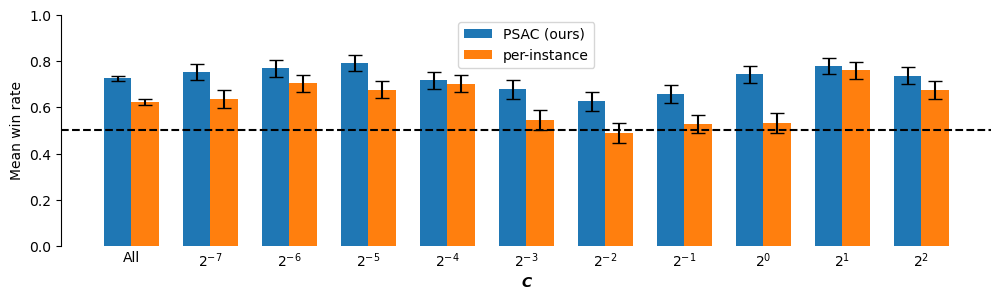

In [7]:
def get_avg_values_with_all(experiment: ExperimentParams, benchmark: str, nr_random_moves: int):
    avg_values = load_avg_results(experiment, benchmark, nr_random_moves)
    avg_values.loc[avg_values.index > 0, 'win_rate'] = 1 - avg_values.loc[avg_values.index > 0, 'win_rate']
    lb = avg_values.loc[avg_values.index > 0, 'lower_bound']
    avg_values.loc[avg_values.index > 0, 'lower_bound'] = 1 - avg_values.loc[avg_values.index > 0, 'upper_bound']
    avg_values.loc[avg_values.index > 0, 'upper_bound'] = 1 - lb
    return avg_values


fig, (ax1) = plt.subplots(1, 1, figsize=(12, 3))


avg_values_baseline = get_avg_values_with_all(experiment, "model_performances_baseline_vs_random_c", 2)
avg_values_baseline['model'] = 'Per-instance'

avg_values_ppo = get_avg_values_with_all(experiment, "model_performances_ppo_vs_random_c", 2)
avg_values_ppo['model'] = 'PSAC'

plot_ratings_bar_both(ax1, avg_values_baseline, avg_values_ppo, 'All')
